In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
df = pd.read_csv('/Users/sumukh/Downloads/employee_data.csv')
df_clean = df[['Experience_Years', 'Salary']].dropna()
print(df_clean.head())

   Experience_Years    Salary
0               0.0  89502.70
1              14.0  61461.55
2               0.0  36678.71
3               4.0  55957.28
4              15.0  76818.89


In [73]:
X = df_clean['Experience_Years'].values.reshape(-1, 1)
y = df_clean['Salary'].values

In [74]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

In [75]:
X_pred = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_pred_poly = poly.transform(X_pred)
y_poly_pred = poly_reg.predict(X_pred_poly)

In [76]:
exp = float(input("Enter the experience in years: "))
salary = poly_reg.predict(poly.transform([[exp]]))
print(f"Salary for {exp} years of experience is {salary}")

Salary for 5.0 years of experience is [63114.83647303]


In [77]:
y_pred = poly_reg.predict(X_poly)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

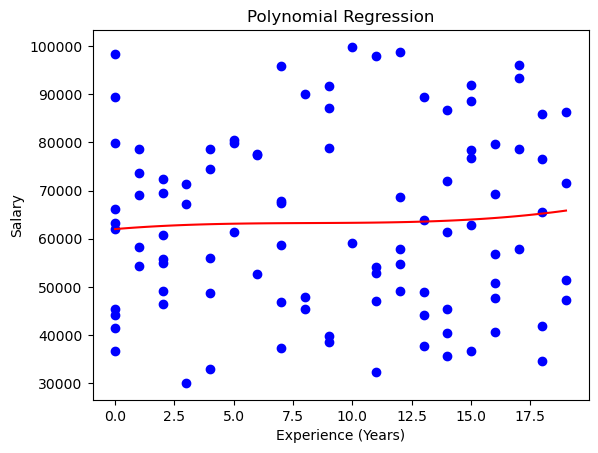

In [78]:
# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(X_pred, y_poly_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

In [70]:
# Output fitted parameters and evaluation metrics
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.0025
RMSE: 18602.7888
